# <h1 style="background-color:orange;display:inline-block;">About this notebook:</h1>

This notebook is related to `Loan Eligibility Check Project`, which is helpful for banks to judge whether they need to give loan to people or not, based on following requirements.

### Steps that are followed to complete this project:
#### Step 1.
First, I remove `null values` from dataset.
#### Step 2.
Second, I handled `categorical variables` and apply One-Hot Encoder and Ordinal Encoder
#### Step 3.
Third, I `scaled variables` using Min-Max Scaler to ensure that all variables are in equal range.
#### Step 4.
On last, I convert undistributed variables into `normal distribution` using PowerTransformer method which is `Yeo-Johnson`.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, FunctionTransformer, PowerTransformer

In [54]:
df = pd.read_csv("loan_eligibility_train.csv")

In [55]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df.drop(columns=["Loan_ID"], inplace=True)

In [57]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# <h1 style="background-color:orange;display:inline-block;">Exploratory Data Analysis</h1>

In [59]:
# these steps are only for EDA
new_df = df.copy()
new_df["Loan_Status"] = new_df["Loan_Status"].str.replace("Y","1")
new_df["Loan_Status"] = new_df["Loan_Status"].str.replace("N","0")

Text(0.5, 1.0, 'Dependents Column on separation of Married')

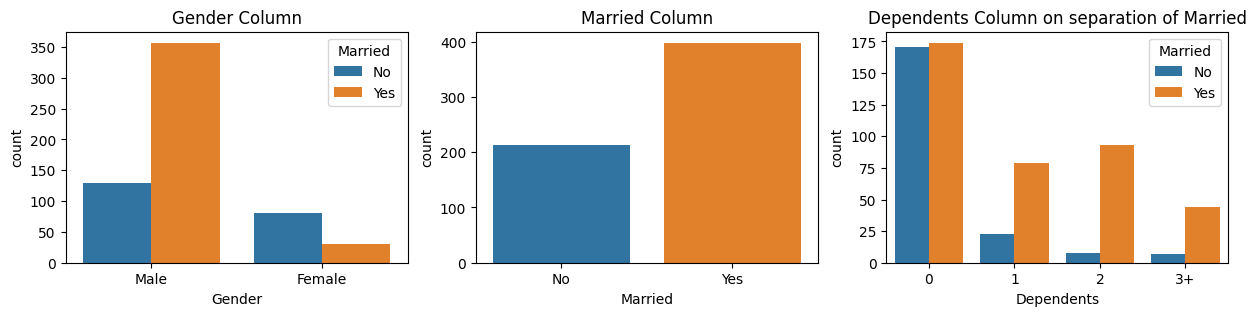

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))

sns.countplot(x=df["Gender"], ax=ax1, hue=df["Married"])
ax1.set_title("Gender Column")

sns.countplot(x=df["Married"], ax=ax2)
ax2.set_title("Married Column")

sns.countplot(x=df["Dependents"], ax=ax3, hue=df["Married"])
ax3.set_title("Dependents Column on separation of Married")

Text(0.5, 1.0, 'Dependents Column')

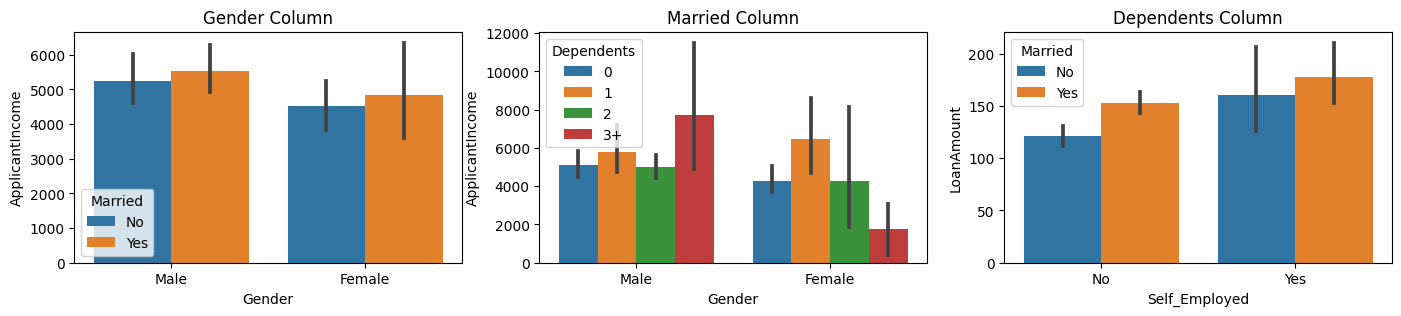

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(17,3))

sns.barplot(x=df["Gender"], y=df["ApplicantIncome"], hue=df["Married"], ax=ax1)
ax1.set_title("Gender Column")

sns.barplot(x=df["Gender"], y=df["ApplicantIncome"], hue=df["Dependents"], ax=ax2)
ax2.set_title("Married Column")

sns.barplot(x=df["Self_Employed"], y=df["LoanAmount"], hue=df["Married"], ax=ax3)
ax3.set_title("Dependents Column")

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

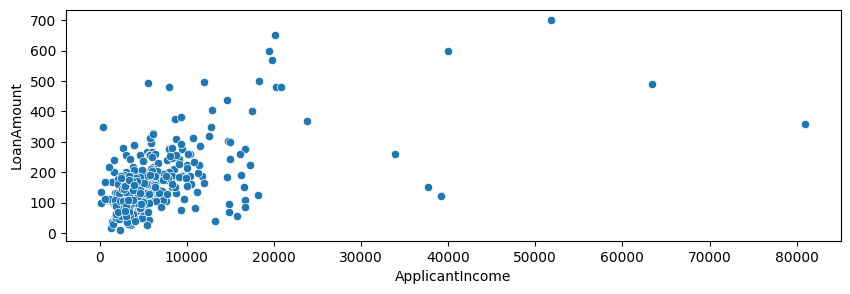

In [62]:
plt.figure(figsize=(10,3))

sns.scatterplot(x=df["ApplicantIncome"], y=df["LoanAmount"])

Text(0.5, 1.0, "'Loan Status' with 'Applicant Income'")

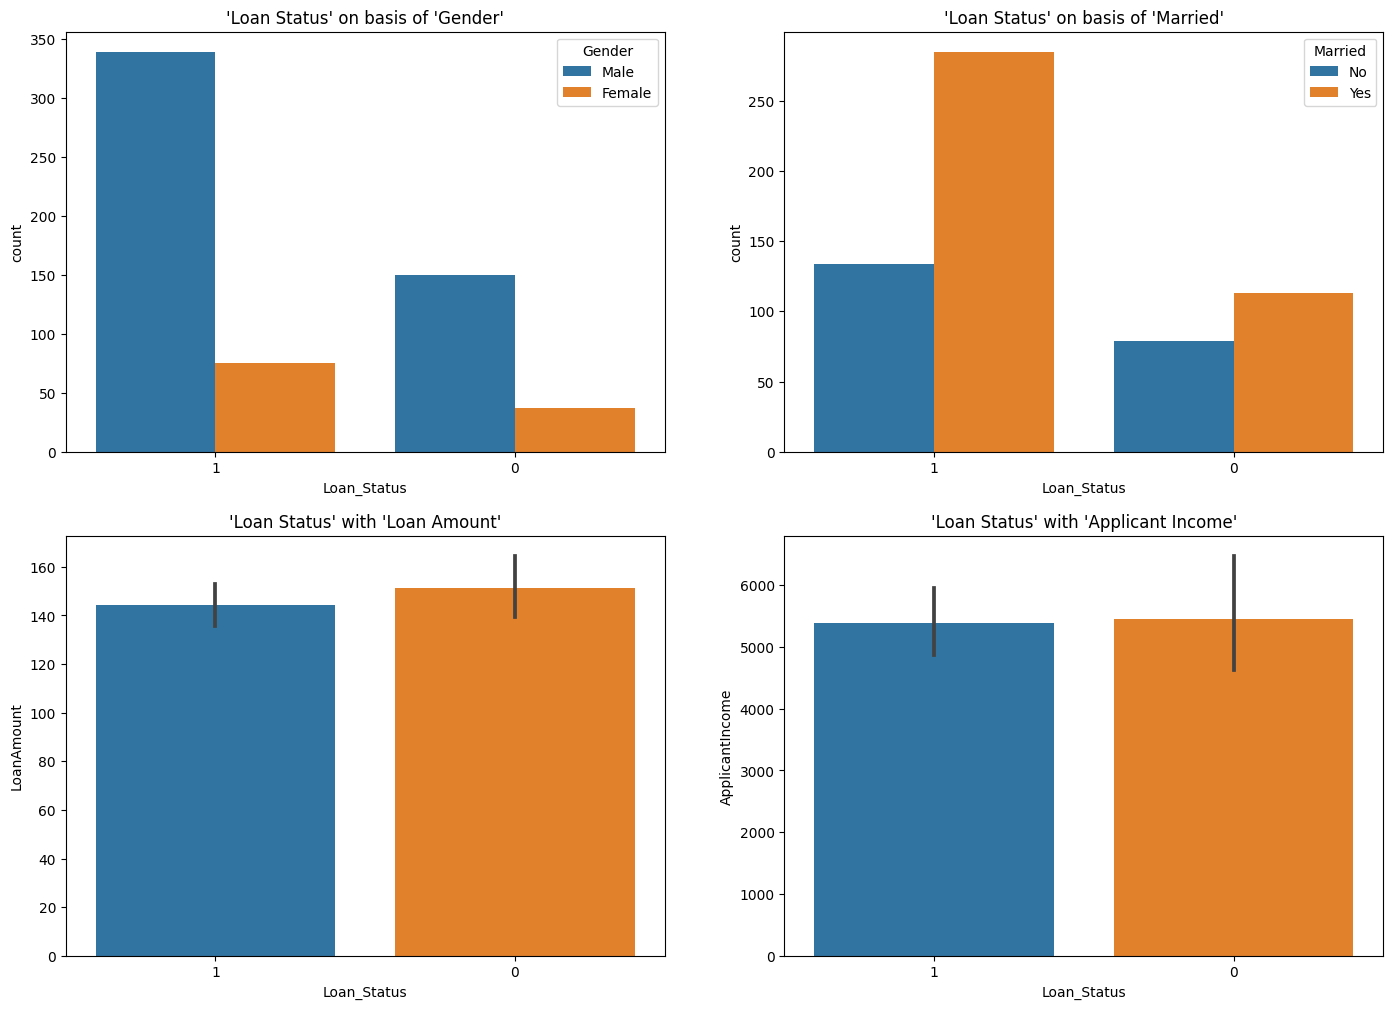

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,12))

sns.countplot(x=new_df["Loan_Status"], hue=new_df["Gender"], ax=axes[0,0])
axes[0,0].set_title("'Loan Status' on basis of 'Gender'")

sns.countplot(x=new_df["Loan_Status"], hue=new_df["Married"], ax=axes[0,1])
axes[0,1].set_title("'Loan Status' on basis of 'Married'")

sns.barplot(x=new_df["Loan_Status"], y=new_df["LoanAmount"], ax=axes[1,0])
axes[1,0].set_title("'Loan Status' with 'Loan Amount'")

sns.barplot(x=new_df["Loan_Status"], y=new_df["ApplicantIncome"], ax=axes[1,1])
axes[1,1].set_title("'Loan Status' with 'Applicant Income'")

# <h1 style="background-color:orange;display:inline-block;">Handling Null Values:</h1>

In [65]:
# fill null values of 'Gender Column'
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
# fill null values of 'Dependent Column'
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
# fill null values of 'Self-Employed Column'
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
# fill null values of 'LoanAmount Column'
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
# fill null vales of 'Loan_Amount_Term'
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
# fill null value of 'Credit_History Column'
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
# fill null value of 'Married Column'
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [66]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
df.shape

(614, 12)

In [68]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [69]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
df['Dependents'] = df['Dependents'].str.replace('+','')

In [71]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [72]:
df["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [73]:
df["Dependents"].unique()

array(['0', '1', '2', '3'], dtype=object)

In [74]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [75]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [76]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [77]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [78]:
df['Credit_History'].unique()

array([1., 0.])

In [79]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

## Splitting data into train and test

In [80]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [190]:
x_train_CT1_df.head(5)

,Gender,Married,Self_Employed,Education,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
0,1,1,0,1.0,1.0,3,3167,4000.0,180.0,300.0,0.0
1,0,0,0,1.0,0.0,0,2900,0.0,71.0,360.0,1.0
2,1,0,0,0.0,2.0,0,3200,2254.0,126.0,180.0,0.0
3,1,0,1,1.0,1.0,0,6950,0.0,175.0,180.0,1.0
4,1,0,0,1.0,1.0,0,2971,2791.0,144.0,360.0,1.0


In [189]:
x_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,Male,Yes,3,Graduate,No,3167.0,4000.0,180.0,300,0,Semiurban
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360,1,Rural
66,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,180,0,Urban
142,Male,No,0,Graduate,Yes,6950.0,0.0,175.0,180,1,Semiurban
222,Male,No,0,Graduate,No,2971.0,2791.0,144.0,360,1,Semiurban


# <h1 style="background-color:orange;display:inline-block;">Column Transformers:</h1>


In [82]:
# column transformer
CT1 = ColumnTransformer(transformers=[
    ("oneHotEncoder", OneHotEncoder(sparse_output=False,drop='first',dtype=np.int32), ["Gender","Married","Self_Employed"]),
    ("ordinalEncoder", OrdinalEncoder(categories=[["Not Graduate","Graduate"],["Rural","Semiurban","Urban"]]), ["Education","Property_Area"])
], remainder='passthrough')

In [83]:
x_train_CT1 = CT1.fit_transform(x_train)
x_test_CT1 = CT1.transform(x_test)

In [84]:
col_names = ["Gender","Married","Self_Employed","Education","Property_Area","Dependents","ApplicantIncome","CoapplicantIncome","Loan_Amount","Loan_Amount_Term","Credit_History"]

x_train_CT1_df = pd.DataFrame(x_train_CT1, columns=col_names)
x_test_CT1_df = pd.DataFrame(x_test_CT1, columns=col_names)

## Model Accuracy before Scaling Variables

In [86]:
lr = LogisticRegression()

lr.fit(x_train_CT1_df, y_train)

y_pred = lr.predict(x_test_CT1_df)
print("Accuracy: ", accuracy_score(y_pred,y_test))

Accuracy:  0.8387096774193549


C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# <h1 style="background-color:orange;display:inline-block;">MinMax Scaler</h1>


In [149]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train_CT1_df)
x_test_scaled = scaler.transform(x_test_CT1_df)

In [150]:
x_train_scaled_df = pd.DataFrame(x_train_scaled , columns=col_names)
x_test_scaled_df = pd.DataFrame(x_test_scaled , columns=col_names)

In [153]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled2 = scaler.fit_transform(x_train_CT1_df)
x_test_scaled2 = scaler.transform(x_test_CT1_df)

x_train_scaled_df2 = pd.DataFrame(x_train_scaled , columns=col_names)
x_test_scaled_df2 = pd.DataFrame(x_test_scaled , columns=col_names)

## Model Accuracy after Scaling Variables

In [154]:
lr2 = LogisticRegression()

lr2.fit(x_train_scaled_df2, y_train)

y_pred2 = lr2.predict(x_test_scaled_df2)
print("Accuracy: ", accuracy_score(y_pred2,y_test))

Accuracy:  0.8279569892473119


In [155]:
x_train_scaled_df.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount,Gender,Married,Self_Employed,Education,Property_Area,Dependents,Loan_Amount_Term,Credit_History
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,0.819578,0.658349,0.142035,0.779271,0.523033,0.258477,0.066732,0.036889,0.197694,0.689111,0.850288
std,0.384908,0.474719,0.349421,0.415137,0.397646,0.341166,0.080456,0.065649,0.124392,0.144762,0.357132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.034261,0.000000,0.131693,0.729730,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.500000,0.000000,0.045294,0.024336,0.167873,0.729730,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.666667,0.069635,0.052800,0.221418,0.729730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <h1 style="background-color:orange;display:inline-block;">Power Transformer</h1>

In [92]:
pt = PowerTransformer()

x_train_pt = pt.fit_transform(x_train_scaled_df)
x_test_pt = pt.transform(x_test_scaled_df)

In [93]:
x_train_pt_df = pd.DataFrame(x_train_pt , columns=col_names)
x_test_pt_df = pd.DataFrame(x_test_pt , columns=col_names)

In [94]:
x_train_pt_df

,Gender,Married,Self_Employed,Education,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
0,0.469191,0.720382,-0.406876,0.532214,-0.039714,1.567531,-0.528541,1.481468,0.775593,-0.965023,-2.383167
1,-2.131327,-1.388152,-0.406876,0.532214,-1.327856,-0.842980,-0.688307,-0.977979,-1.289799,0.174623,0.419610
2,0.469191,-1.388152,-0.406876,-1.878945,1.190663,-0.842980,-0.509430,0.824100,-0.038421,-2.221572,-2.383167
3,0.469191,-1.388152,2.457751,0.532214,-0.039714,-0.842980,0.978823,-0.977979,0.712840,-2.221572,0.419610
4,0.469191,-1.388152,-0.406876,0.532214,-0.039714,-0.842980,-0.644914,1.072005,0.269302,0.174623,0.419610
...,...,...,...,...,...,...,...,...,...,...,...
516,0.469191,0.720382,-0.406876,0.532214,1.190663,-0.842980,-0.565997,0.241953,-1.046315,0.174623,0.419610
517,0.469191,0.720382,-0.406876,0.532214,-0.039714,0.719314,1.872876,2.201971,2.025388,0.174623,0.419610
518,0.469191,0.720382,-0.406876,0.532214,-0.039714,1.567531,0.416004,1.218875,1.005720,0.174623,0.419610
519,0.469191,0.720382,-0.406876,-1.878945,1.190663,-0.842980,0.715620,-0.977979,0.510599,0.174623,0.419610


## Model Accuracy after Power Transformation

In [95]:
lr3 = LogisticRegression()

lr3.fit(x_train_pt_df, y_train)

y_pred = lr3.predict(x_test_pt_df)
print("Accuracy: ", accuracy_score(y_pred,y_test))

Accuracy:  0.8279569892473119


In [96]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,Male,Yes,3,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
66,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
142,Male,No,0,Graduate,Yes,6950,0.0,175.0,180.0,1.0,Semiurban
222,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
359,Male,Yes,3,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban
192,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban


### Visualization shows change in distribution of data after applying Power Transformation. And we can see that 2 columns are benefited from this method

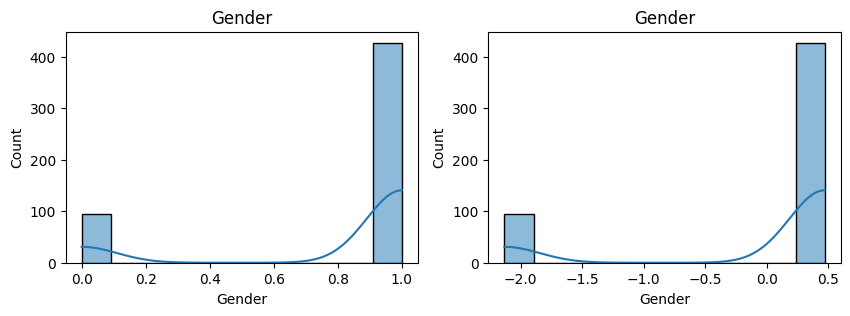

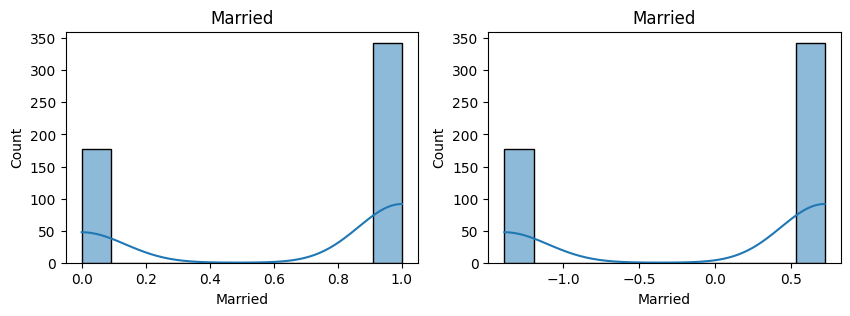

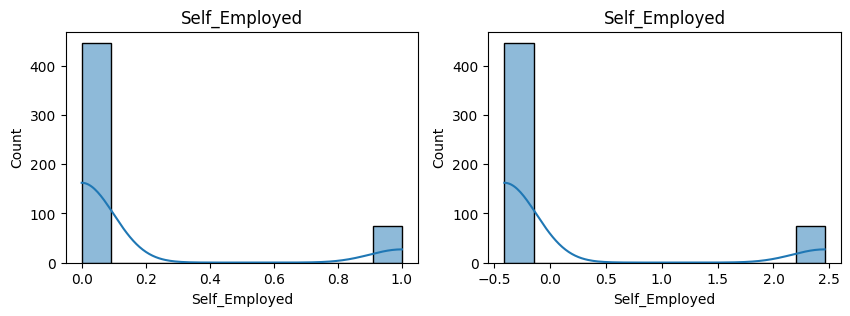

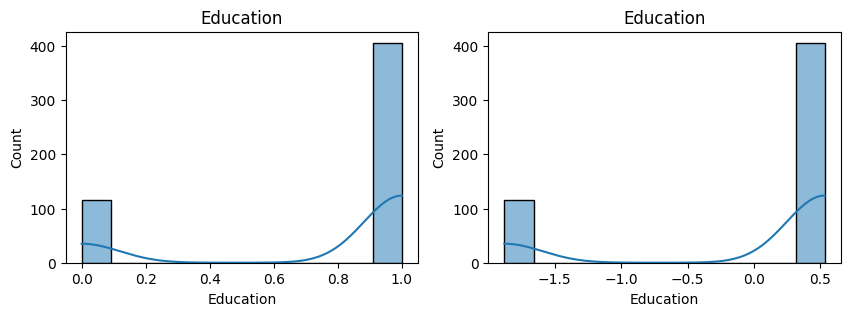

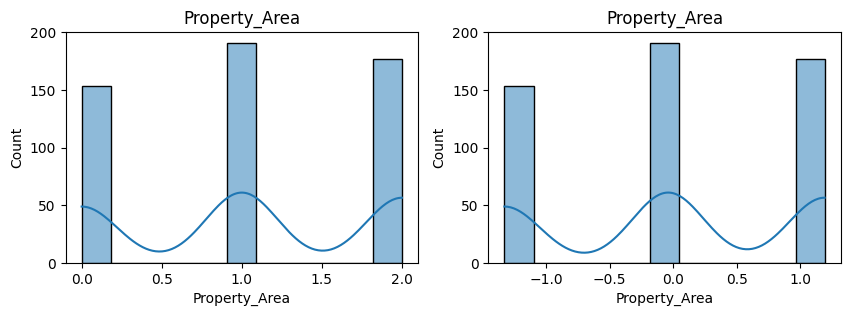

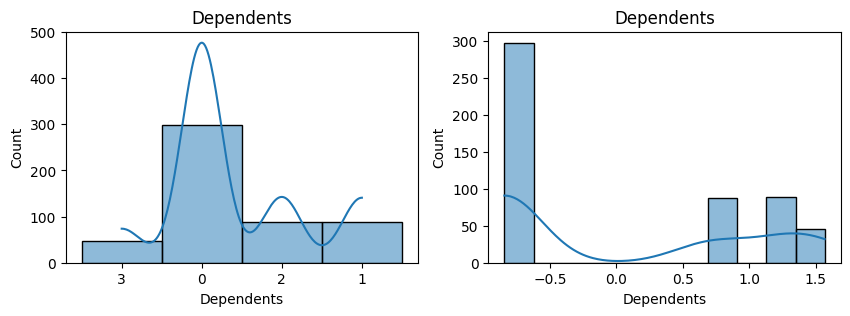

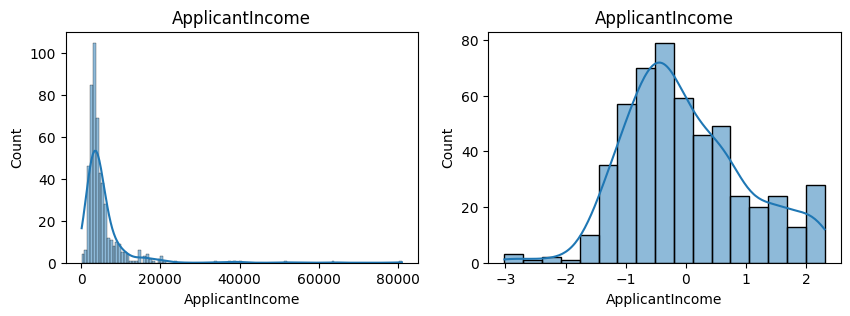

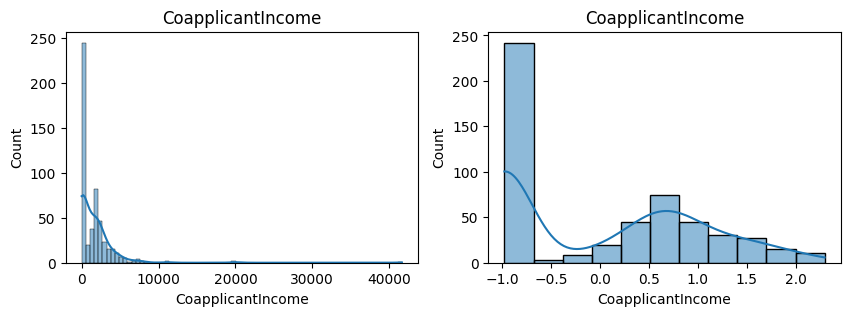

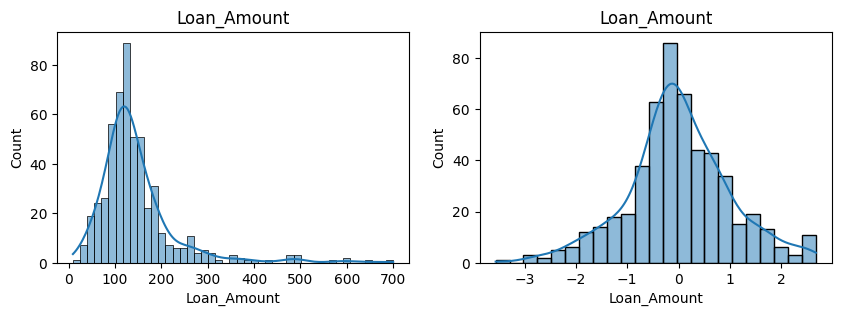

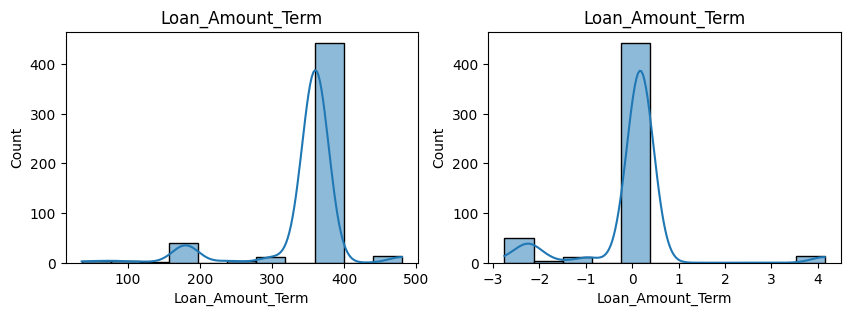

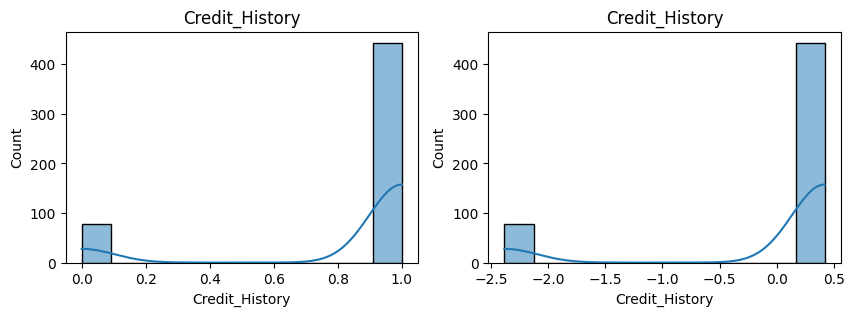

In [97]:
for col in x_train_CT1_df.columns:
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,3))

    sns.histplot(x_train_CT1_df[col], kde=True, ax=ax1)
    ax1.set_title(col)

    sns.histplot(x_train_pt_df[col], kde=True, ax=ax2)
    ax2.set_title(col)

### Visualization shows data before and after applying scaling. And we see that after scaling variables, they all come to equal scale from 0 to 1.

Text(0.5, 1.0, 'ApplicantIncome and CoapplicantIncome')

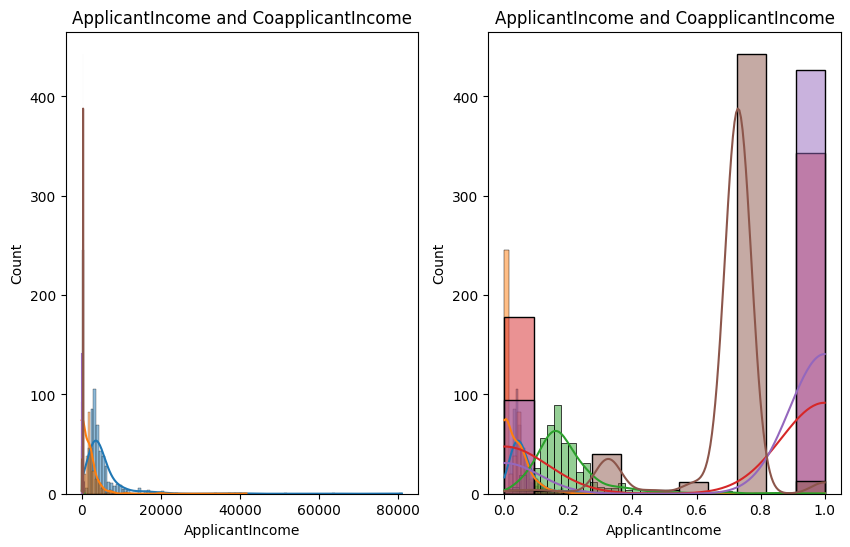

In [98]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,6))

sns.histplot(x_train_CT1_df["ApplicantIncome"], kde=True, ax=ax1)
sns.histplot(x_train_CT1_df["CoapplicantIncome"], kde=True, ax=ax1)
sns.histplot(x_train_CT1_df["Loan_Amount"], kde=True, ax=ax1)
sns.histplot(x_train_CT1_df["Married"], kde=True, ax=ax1)
sns.histplot(x_train_CT1_df["Gender"], kde=True, ax=ax1)
sns.histplot(x_train_CT1_df["Loan_Amount_Term"], kde=True, ax=ax1)
ax1.set_title("ApplicantIncome and CoapplicantIncome")

sns.histplot(x_train_scaled_df["ApplicantIncome"], kde=True, ax=ax2)
sns.histplot(x_train_scaled_df["CoapplicantIncome"], kde=True, ax=ax2)
sns.histplot(x_train_scaled_df["Loan_Amount"], kde=True, ax=ax2)
sns.histplot(x_train_scaled_df["Married"], kde=True, ax=ax2)
sns.histplot(x_train_scaled_df["Gender"], kde=True, ax=ax2)
sns.histplot(x_train_scaled_df["Loan_Amount_Term"], kde=True, ax=ax2)
ax2.set_title("ApplicantIncome and CoapplicantIncome")

In [99]:
x_train_scaled_df

,Gender,Married,Self_Employed,Education,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
0,1.0,1.0,0.0,1.0,0.5,1.000000,0.037316,0.095999,0.247467,0.594595,0.0
1,0.0,0.0,0.0,1.0,0.0,0.000000,0.034014,0.000000,0.089725,0.729730,1.0
2,1.0,0.0,0.0,0.0,1.0,0.000000,0.037724,0.054096,0.169320,0.324324,0.0
3,1.0,0.0,1.0,1.0,0.5,0.000000,0.084106,0.000000,0.240232,0.324324,1.0
4,1.0,0.0,0.0,1.0,0.5,0.000000,0.034892,0.066983,0.195369,0.729730,1.0
...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,1.0,0.0,1.0,1.0,0.000000,0.036524,0.031200,0.102750,0.729730,1.0
517,1.0,1.0,0.0,1.0,0.5,0.333333,0.156970,0.263230,0.492041,0.729730,1.0
518,1.0,1.0,0.0,1.0,0.5,1.000000,0.062053,0.076007,0.276411,0.729730,1.0
519,1.0,1.0,0.0,0.0,1.0,0.000000,0.072764,0.000000,0.218524,0.729730,1.0


In [100]:
# column transformer
CT2 = ColumnTransformer(transformers=[
    ("Powertransformer", PowerTransformer(), [6,7,8])
], remainder="passthrough")

In [101]:
x_train_CT2 = CT2.fit_transform(x_train_scaled_df)
x_test_CT2 = CT2.transform(x_test_scaled_df)

In [102]:
col_names = ["ApplicantIncome","CoapplicantIncome","Loan_Amount","Gender","Married","Self_Employed","Education","Property_Area","Dependents","Loan_Amount_Term","Credit_History"]

x_train_CT2_df = pd.DataFrame(x_train_CT2, columns=col_names)
x_test_CT2_df = pd.DataFrame(x_test_CT2, columns=col_names)

In [103]:
x_train_CT2_df

,ApplicantIncome,CoapplicantIncome,Loan_Amount,Gender,Married,Self_Employed,Education,Property_Area,Dependents,Loan_Amount_Term,Credit_History
0,-0.528541,1.481468,0.775593,1.0,1.0,0.0,1.0,0.5,1.000000,0.594595,0.0
1,-0.688307,-0.977979,-1.289799,0.0,0.0,0.0,1.0,0.0,0.000000,0.729730,1.0
2,-0.509430,0.824100,-0.038421,1.0,0.0,0.0,0.0,1.0,0.000000,0.324324,0.0
3,0.978823,-0.977979,0.712840,1.0,0.0,1.0,1.0,0.5,0.000000,0.324324,1.0
4,-0.644914,1.072005,0.269302,1.0,0.0,0.0,1.0,0.5,0.000000,0.729730,1.0
...,...,...,...,...,...,...,...,...,...,...,...
516,-0.565997,0.241953,-1.046315,1.0,1.0,0.0,1.0,1.0,0.000000,0.729730,1.0
517,1.872876,2.201971,2.025388,1.0,1.0,0.0,1.0,0.5,0.333333,0.729730,1.0
518,0.416004,1.218875,1.005720,1.0,1.0,0.0,1.0,0.5,1.000000,0.729730,1.0
519,0.715620,-0.977979,0.510599,1.0,1.0,0.0,0.0,1.0,0.000000,0.729730,1.0


In [104]:
lr4 = LogisticRegression()

lr4.fit(x_train_CT2_df, y_train)

y_pred = lr4.predict(x_test_CT2_df)
print("Accuracy: ", accuracy_score(y_pred,y_test))

Accuracy:  0.8279569892473119


# <h1 style="background-color:orange;display:inline-block;">Making Pipeline</h1>

### First, we change necessary data types

In [105]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [106]:
df["Dependents"] = df["Dependents"].astype("int32")
df["CoapplicantIncome"] = df["CoapplicantIncome"].astype("int32")
df["LoanAmount"] = df["LoanAmount"].astype("int32")
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype("int32")
df["Credit_History"] = df["Credit_History"].astype("int32")

In [107]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [108]:
# column transformer 1
CT1 = ColumnTransformer(transformers=[
    ("oneHotEncoder", OneHotEncoder(sparse_output=False,drop='first',dtype=np.int32), ["Gender","Married","Self_Employed"]),
    ("ordinalEncoder", OrdinalEncoder(categories=[["Not Graduate","Graduate"],["Rural","Semiurban","Urban"]]), ["Education","Property_Area"])
], remainder='passthrough')

In [109]:
# column transformer 2
CT2 = ColumnTransformer(transformers=[
    ("minMaxScaler", MinMaxScaler(), slice(0,None))
])

In [110]:
# column transformer 3
CT3 = ColumnTransformer(transformers=[
    ("powerTransformer", PowerTransformer(), [6,7,8])
])

In [111]:
# column transformer 4
CT4 = LogisticRegression()

In [112]:
# making pipeling
pipe = Pipeline([
    ("first_transformer", CT1),
    ("second_transformer", CT2),
    ("third_transformer", CT3),
    ("model_transformer", CT4)
])

### `Import Point` : If we use Model inside pipeline, then simply use fit method. But if we don't use model in pipeline, then we use fit_transform on both x_train and x_test 

In [113]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('first_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Self_Employed']),
                                                 ('ordinalEncoder',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'Graduate',
                                                                              'Graduate'],
                                                                             ['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  ['Education',
                                                   'Property_Area'])])),
                ('second_transformer',
                 ColumnTransformer(transformers=[('minMaxScaler',
                                                  MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('third_transformer',
                 ColumnTransformer(transformers=[('powerTransformer',
                                                  PowerTransformer(),
                                                  [6, 7, 8])])),
                ('model_transformer', LogisticRegression())])

In [114]:
y_pred = pipe.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y'], dtype=object)

In [115]:
print("Accuracy of Pipeline : ", accuracy_score(y_pred,y_test))

Accuracy of Pipeline :  0.7311827956989247


### Checking Model performance on unseen data

In [116]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,Male,Yes,3,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
66,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
142,Male,No,0,Graduate,Yes,6950,0.0,175.0,180.0,1.0,Semiurban
222,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
359,Male,Yes,3,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban
192,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban


In [117]:
test_df = pd.DataFrame({"Gender":["Male","Female"],
                        "Married":["Yes","No"],
                        "Dependents":[0,4],
                        "Education":["Not Graduate","Not Graduate"],
                        "Self_Employed":["Yes","No"],
                        "ApplicantIncome":[123000,10],
                        "CoapplicantIncome":[231100,10],
                        "LoanAmount":[234000000,24000000],
                        "Loan_Amount_Term":[360,360],
                        "Credit_History":[1,1],
                        "Property_Area":["Rural","Urban"]})
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Not Graduate,Yes,123000,231100,234000000,360,1,Rural
1,Female,No,4,Not Graduate,No,10,10,24000000,360,1,Urban


In [118]:
pipe.predict(test_df)

array(['Y', 'N'], dtype=object)

# Trying to improve model performance

In [119]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,120,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y


In [120]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [122]:
df["Loan_Status"] = df["Loan_Status"].replace("Y","1")
df["Loan_Status"] = df["Loan_Status"].replace("N","0")
df["Loan_Status"] = df["Loan_Status"].astype("int")

In [123]:
df.select_dtypes(["int"]).corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118202,0.030429,0.163017,-0.103864,-0.040160,0.010118
ApplicantIncome,0.118202,1.000000,-0.116604,0.564698,-0.046531,-0.018615,-0.004710
CoapplicantIncome,0.030429,-0.116604,1.000000,0.189723,-0.059382,0.011134,-0.059188
LoanAmount,0.163017,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808
Loan_Amount_Term,-0.103864,-0.046531,-0.059382,0.037152,1.000000,-0.004705,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556
Loan_Status,0.010118,-0.004710,-0.059188,-0.031808,-0.022549,0.540556,1.000000


In [124]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: count, dtype: int64

In [125]:
df["Family Income"] = df["ApplicantIncome"]+df["CoapplicantIncome"]

In [126]:
df[["Family Income","Loan_Status"]].corr()

,Family Income,Loan_Status
Family Income,1.000000,-0.031271
Loan_Status,-0.031271,1.000000


Text(0.5, 1.0, 'Loan Amount')

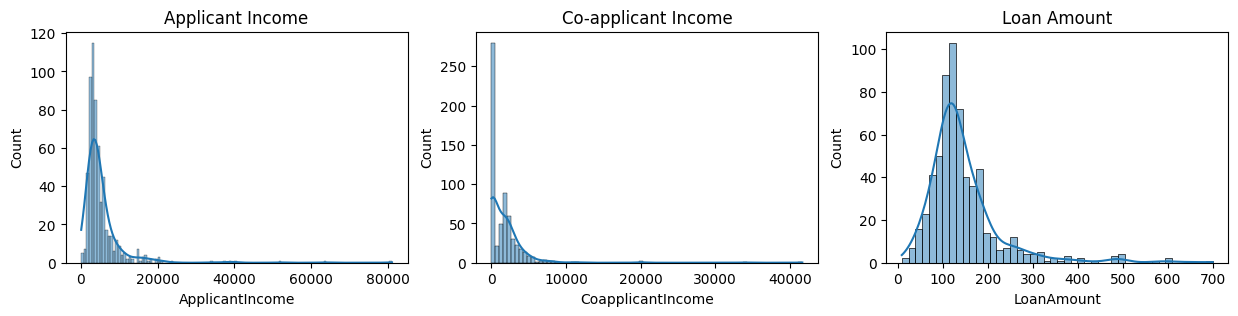

In [127]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))

sns.histplot(df["ApplicantIncome"], kde=True, ax=ax1)
ax1.set_title("Applicant Income")

sns.histplot(df["CoapplicantIncome"], kde=True, ax=ax2)
ax2.set_title("Co-applicant Income")

sns.histplot(df["LoanAmount"], kde=True, ax=ax3)
ax3.set_title("Loan Amount")

### Because data is skewed that why I remove outliers using `iqr method`

Text(0.5, 1.0, 'Loan Amount')

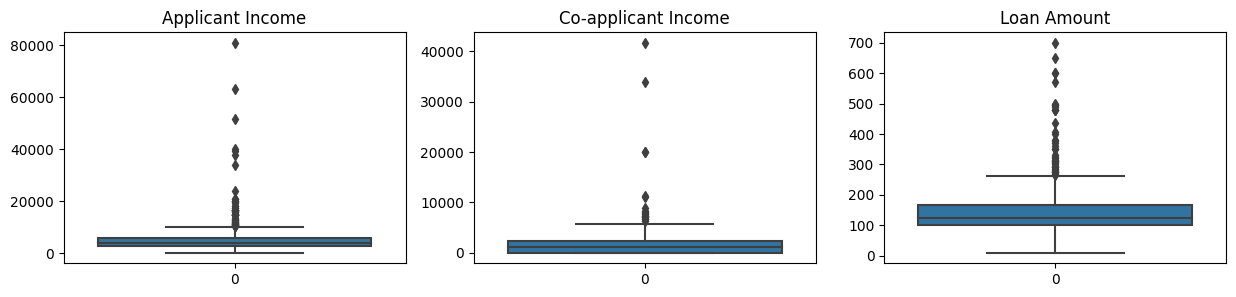

In [128]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))

sns.boxplot(df["ApplicantIncome"], ax=ax1)
ax1.set_title("Applicant Income")

sns.boxplot(df["CoapplicantIncome"], ax=ax2)
ax2.set_title("Co-applicant Income")

sns.boxplot(df["LoanAmount"], ax=ax3)
ax3.set_title("Loan Amount")

In [129]:
# Applicant Income
Q1_app = df["ApplicantIncome"].quantile(0.25)
Q3_app = df["ApplicantIncome"].quantile(0.75)
IQR_app = Q3_app - Q1_app

lower_limit_1 = Q1_app - 1.5*IQR_app
upper_limit_1 = Q3_app + 1.5*IQR_app

df.loc[((df["ApplicantIncome"]<lower_limit_1) | (df["ApplicantIncome"]>upper_limit_1)) , :].shape

(50, 13)

In [130]:
# Co-applicant Income
Q1_coapp = df["CoapplicantIncome"].quantile(0.25)
Q3_coapp = df["CoapplicantIncome"].quantile(0.75)
IQR_coapp = Q3_coapp - Q1_coapp

lower_limit_2 = Q1_coapp - 1.5*IQR_coapp
upper_limit_2 = Q3_coapp + 1.5*IQR_coapp

df.loc[((df["CoapplicantIncome"]<lower_limit_2) | (df["CoapplicantIncome"]>upper_limit_2)) , :].shape

(18, 13)

In [131]:
# Loan Amount
Q1_loan = df["LoanAmount"].quantile(0.25)
Q3_loan = df["LoanAmount"].quantile(0.75)
IQR_loan = Q3_loan - Q1_loan

lower_limit_3 = Q1_loan - 1.5*IQR_loan
upper_limit_3 = Q3_loan + 1.5*IQR_loan

df.loc[((df["LoanAmount"]<lower_limit_3) | (df["LoanAmount"]>upper_limit_3)) , :].shape

(41, 13)

### Our Dataset is small, and total outliers from these 3 columns are '50+18+41 =109'. So we don't remove these error but with the help of `Capping` we resolve this issue

In [132]:
# Applicant Income
df["ApplicantIncome"] = np.where(
    df["ApplicantIncome"]<lower_limit_1,
    lower_limit_1,
    np.where(
        df["ApplicantIncome"]>upper_limit_1,
        upper_limit_1,
        df["ApplicantIncome"]
    )
)

In [133]:
# Co-applicant Income
df["CoapplicantIncome"] = np.where(
    df["CoapplicantIncome"]<lower_limit_2,
    lower_limit_2,
    np.where(
        df["CoapplicantIncome"]>upper_limit_2,
        upper_limit_2,
        df["CoapplicantIncome"]
    )
)

In [134]:
# Loan Amount
df["LoanAmount"] = np.where(
    df["LoanAmount"]<lower_limit_3,
    lower_limit_3,
    np.where(
        df["LoanAmount"]>upper_limit_3,
        upper_limit_3,
        df["LoanAmount"]
    )
)

Text(0.5, 1.0, 'Loan Amount')

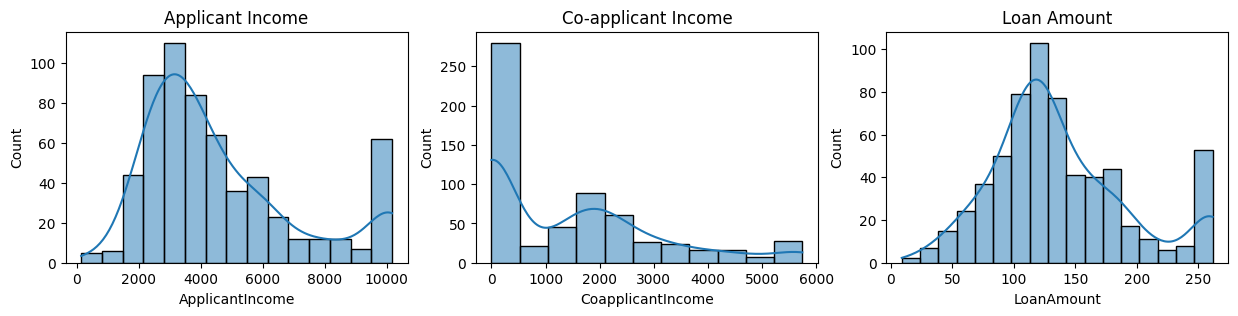

In [135]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))

sns.histplot(df["ApplicantIncome"], kde=True, ax=ax1)
ax1.set_title("Applicant Income")

sns.histplot(df["CoapplicantIncome"], kde=True, ax=ax2)
ax2.set_title("Co-applicant Income")

sns.histplot(df["LoanAmount"], kde=True, ax=ax3)
ax3.set_title("Loan Amount")

Text(0.5, 1.0, 'Loan Amount')

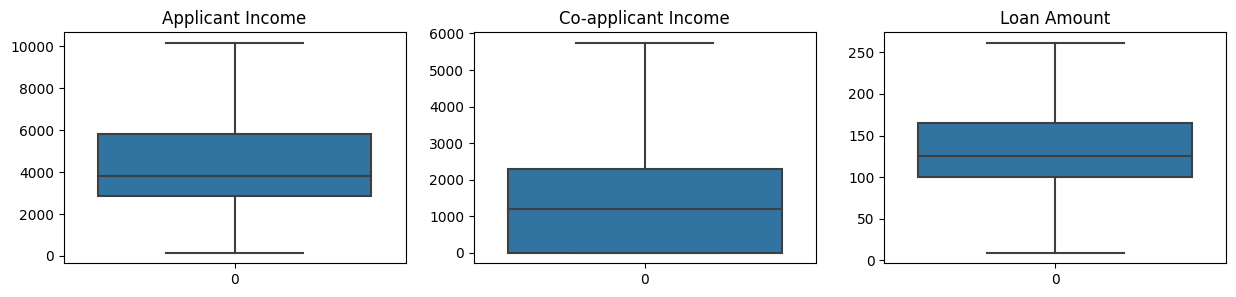

In [136]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))

sns.boxplot(df["ApplicantIncome"], ax=ax1)
ax1.set_title("Applicant Income")

sns.boxplot(df["CoapplicantIncome"], ax=ax2)
ax2.set_title("Co-applicant Income")

sns.boxplot(df["LoanAmount"], ax=ax3)
ax3.set_title("Loan Amount")

In [137]:
df.select_dtypes(["int","float"]).corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Family Income
Dependents,1.000000,0.111565,-0.031510,0.164402,-0.103864,-0.040160,0.010118,0.125590
ApplicantIncome,0.111565,1.000000,-0.228955,0.557007,-0.023926,0.035345,-0.000442,0.573203
CoapplicantIncome,-0.031510,-0.228955,1.000000,0.265883,-0.029293,-0.001710,0.011982,0.187624
LoanAmount,0.164402,0.557007,0.265883,1.000000,0.063872,0.004852,-0.045129,0.499630
Loan_Amount_Term,-0.103864,-0.023926,-0.029293,0.063872,1.000000,-0.004705,-0.022549,-0.070917
Credit_History,-0.040160,0.035345,-0.001710,0.004852,-0.004705,1.000000,0.540556,-0.012563
Loan_Status,0.010118,-0.000442,0.011982,-0.045129,-0.022549,0.540556,1.000000,-0.031271
Family Income,0.125590,0.573203,0.187624,0.499630,-0.070917,-0.012563,-0.031271,1.000000


In [138]:
df.drop(columns=["Family Income"], inplace=True)

In [139]:
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status            int32
dtype: object

In [156]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [177]:
# making pipeling
pipe = Pipeline([
    ("first_transformer", CT1),
    ("second_transformer", CT2),
#     ("third_transformer", CT3),
    ("model_transformer", CT4)
])

In [178]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('first_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Self_Employed']),
                                                 ('ordinalEncoder',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'Graduate',
                                                                              'Graduate'],
                                                                             ['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  ['Education',
                                                   'Property_Area'])])),
                ('second_transformer',
                 ColumnTransformer(transformers=[('minMaxScaler',
                                                  MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('model_transformer', LogisticRegression())])

In [179]:
results = pipe.predict(x_test)
results

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [180]:
print(accuracy_score(results,y_test))

0.8279569892473119


In [187]:
import pickle

pickle.dump(pipe, open("imported/pipeline.pkl","wb"))
pickle.dump(df, open("imported/dataframe.pkl","wb"))